TODO: 
  * Add univariate data fitting explanation 
  * Show polynomial data fitting 
  * Show perioding data fitting 
  * Show Multivariate data fitting 
  * Add applications 
 

### Least Squares 

This notebook rederives and implements the classic least squares problem in applied mathematics and linear algebra. We begin by revisiting the least squares problem, and derive its solution from basic linear algebra and calculus. Then, we implement our own version of least squares, and see it in use for a few example applications. 

#### The least squares problem 

In the broadest applied mathematics context, least squares describes the problem of solving an overdetermined linear system. As a reminder, when we say "linear system" we simply mean something of the form

$$
Ax = b 
$$

for some $A \in \mathbb{R}^{m \times n}$, $x \in \mathbb{R}^{n}$, and $b \in \mathbb{R}^{m}$. Though we're using linear algebraic objects like matrices and vectors, remember that the small set of symbols above really represents a system of $m$ equations in $n$ variables, one equation per row of $A$. Overdetermined means that $A$ is tall and thin, so that we have many more equations to solve than we do variables to choose. Thinking in visualizeable dimensions, consider the case $m = 3, n = 2$. Assuming $A$'s two columns are independent, the image or column space of $A$ (all the vectors that $Ax$ can hit) is a plane that lies in. $\mathbb{R}^2$, while $b$ is a three vector which can lie anywhere in $\mathbb{R}^3$, so it is unlikely that $b$ simply happens to lie in $A$'s image.

In the earlier $Ax = b$ problem, $A$ was square with independent columns, so we could simply solve the system by computing $A$'s inverse and writing $x = A^{-1}b$. The least squares problem is thus motivated _mathematically_ by the desire to construct sensible solutions to the aforementioned overdetermined problem, where $A$ is not square and thus can't have an inverse. In practice, we will find that a surprising number of applications can be framed as least squares problems. 

#### What solving often means in applied mathematics

It is clear we have to ammend exactly what is meant by "solving" the problem given above, since, by assumption, we are motivated by the case in which $b$ does _not_ lie in $A$'s image. Put another way, we aim to "solve" the problem in which there simply does not exist an $x$ such that $Ax = b$, so what could we mean by solve? In the least squares context, we are really solving a mathematical optimization problem. Mathematical optimization problems are defined by a function we wish to minimize/maximize, and an optional set of constraints or conditions that must be satisfied. More formally, these problems look like the following: 

$$
\text{minimize} \; f_0(x) \\
\text{subject to} \; f_i(x) \leq b_i, \; \; i \in \{1, \dots, m\}
$$

Here $f_0$ is the function we wish to minimize (when we're minimizing we often call $f_0$ a loss, error, or cost function), $x$ is the variable we choose, and the $f_i$'s represent a set of constraints that must be satisfied for some $x$ to be valid, in this case simple linear inequality constraints. If there are no constraints, it is called an unconstrained optimization problem, meaning $x$ can be chosen anywhere in the domain of $f_0$. If $x$ satisfies the constraints (or there are no constraints), it is said to be a "feasible" point, so the point which minimizes $f_0$ over all feasible points is called the "solution" to the problem.

Tying this back to least squares, we want to define a $f_0(x)$ such that choosing an $x$ to minimize $f_0$ gets our $Ax$ "close" to $b$ (even though we acknowledge it is unlikely that we can achieve $Ax$ _equal_ to $b$). This means we'd like $e = Ax - b$ to be small for our choice of $x$, where $e$ is a vector of "errors" or "residuals". The least squares solution finds $x$ such that $Ax$ is closest to $b$ in the 2-norm. That is, the least squares problem is the mathematical optimization problem 

$$
\text{minimize} \; ||Ax - b||_2^2 \\ 
$$

so this is an unconstrained optimization problem with $f_0(x) = ||e||_2^2 = ||Ax - b||_2^2$. It may seem strange that we square this quantity, but for now rest assured that this does not give us a different solution than had we not squared it; the norm can only return values greater than or equal to zero, and the square function is monotonic over that domain, so minimizing the square doesn't affect our solution. Later, we'll talk about interesting statistical justifications of using the 2-norm, but for now, we appeal to the intuition that this is a sensible function to minimize; it is small when $Ax$ is close to $b$, and increases quadratically as $Ax$ gets farther from $b$. 

This function is a quadratic form in the variable $x$, so we can derive the solution from basic calculus principles, finding the $x$ which makes the gradient of this function vanish. First we will expand the function and derive its gradient. 

$$
\begin{align}
\nabla_x ||Ax - b||_2^2 &= \nabla_x [(Ax - b)^T(Ax - b)] \\ 
&= \nabla_x [x^TA^TAx - x^TA^Tb - b^TAx + b^Tb] \\ 
&= \nabla_x x^TA^TA x - \nabla_x x^TA^Tb - \nabla_x b^TAx + \nabla_x b^Tb \\ 
&= 2A^TA x - 2A^Tb 
\end{align}
$$

Now setting that gradient to zero: 

$$
\begin{align}
2A^TA\widehat{x} - 2A^Tb &= 0 \\ 
A^TA\widehat{x} &= A^Tb \\ 
\end{align}
$$

These are called the "normal equations". We've replaced $x$ with $\widehat{x}$ to emphasize that now we're solving an equation for the particular optimal point $\widehat{x}$, as opposed to previous, where we were taking a gradient of a function of the general variable $x$. The matrix $A^TA$ is called the Gram matrix of $A$, and will be invertible so long as $A$ has independent columns (we will learn how to deal with the case of a singular $A$ shortly). You may also recognize $(A^TA)^{-1}A^T$ as the psuedoinverse of $A$, which is written $A^{\dagger}$. So, the final solution is: 

$$
\begin{align}
\widehat{x} &= (A^TA)^{-1}A^Tb \\ 
\widehat{x} &= A^{\dagger}b
\end{align}
$$ 

#### A geometric interpretation of the solution 

We've discussed already that $\widehat{x}$ represents the coefficients for the linear combination of $A$'s columns that is closest to the point $b$, but here we'll develop some visual intuition for that statement. Consider the case $A \in \mathbb{R}^{3 \times 2}$, so that $\widehat{x} \in \mathbb{R}^{2}$ and $b \in \mathbb{R}^3$. We'll also assume that $A$'s columns are independent. For some visual intuition, to begin with I'll plot $a_1, a_2$ (the columns of $A$). 

<img src="graphics/ima.png" width="360" height="360" align="center"/>

Remember, these are vectors in $\mathbb{R}^3$, but since there are only two of them, their span (the image of $A$) is just a plane (and, out of all possible choices of $b$, its highly unlikely that $b$ happens to lie on this plane). Here I emphasize $A$'s image with the orange disk. 

<img src="graphics/colspacea.png" width="360" height="360" align="center"/>

Finally, I show $b$ as a red point, which is clearly not in the column space of $A$. 


<img src="graphics/colspacea_withb.png" width="360" height="360" align="center"/>

Since we want the combination of $A$'s columns which minimizes $e = ||A\widehat{x} - b||_2^2$, you might see already that $e$ must be orthogonal to $A\widehat{x}$. Visually, this mean we can actually find $\widehat{x}$ by projecting $b$ onto the columnspace of $A$. This is a particularly appealing interpretation of the psuedoinverse $A^{\dagger}$. It actually functions as a projection matrix which acts on $b$ to to project it onto the image of $A$. 

Here I show the error vector $e$ in purple, which also shows the path of the projection of $b$ (red) onto the columnspace of $A$. The blue point represents $A\widehat{x}$. 

<img src="graphics/optimal_x.png" width="360" height="360" align="center"/>

#### Computing the least squares solution $\widehat{x}$

Now that we've developed some intuition for least squares problems and their solutions, let's quickly learn how to compute their solutions, and then apply this tool to some applications. Let $A = QR$ be the $QR$-factorization of $A$. Then we have 

$$
\begin{align} 
Ax &= b \\ 
QRx &= b \\ 
Rx &= Q^Tb
\end{align}
$$

where on the last line we use the fact that $Q^T = Q^{-1}$ since $Q$ is orthogonal. Then we simply need to solve the upper triangular system here, which we can do by backsubstitution. A nice property of least-squares is its low complexity. In particular, one can show that computing the least squares solution is $O(mn^2)$, which is, conveniently, linear is the "tall" dimension and quadratic in the "thin" dimension. Under certain structural assumptions of $A$, one can solve this even more quickly.   

In practice, least squares will be available in any numerical linear algebra package. In Python, for most problems (except those for which $m$ is immense), numpy's linear algebra module is more than sufficient. Numpy's solver accepts the two given data arguments, $A$ and $b$, and returns $\widehat{x}$. 

#### Least squares in machine learning 

The central of least squares in the context of statistical inference and machine learning is that of data fitting. In this context, we are given a set of inputs $x$ and outputs $y$. The outputs are assumed to have a functional relation to the inputs, so that $f(x) = y$, and our job is to approximate $f$ with some $\hat{f}$ (data fitting is also often called "function approximation" for this reason). When the input $x$ is a scalar, its often called a "feature", "covariate", or "predictor". Likewise, when $x$ is a vector, its called a feature-_vector_, etc. The output $y$ is also often referred to as the "response" or "dependent variable" or "outcome". In this tutorial we'll treat $x$ as a vector, and $y$ as a scalar. 

In this context, we receive data which give us information about the function $f$ we wish to approximate. The data arrive as a set of _samples_, _measurements_, or _observations_. An individual sample corresponds to a feature vector and the corresponding response. A set of $N$ such examples can be written as 

$$
\text{Data} = \{x^{(i)}, y^{(i)}\}_{i = 1}^N
$$

Where the superscript $(i)$ is an _index_ (it is read as the $i$<sup>th</sup> sample rather than an exponent). We use the subscript to denote vector elements, so that $x_j^{(i)}$ is the value of the $j$<sup>th</sup> feature for the $i$<sup>th</sup> example. To capture the relationship between the features $x$ and the outcomes $y$ we develop a _model_ $\hat{f} : \mathbb{R}^p \mapsto \mathbb{R}$, where $p$ is the number of features (equivalently, the length of the feature vector $x$). Evaluating the model for a particular feature vector $x^*$ gives us the _prediction_ $\hat{f}(x^*)$ of the outcome. In this tutorial we'll focus on a particular functional form for our model $\hat{f}$, the _linear in the parameters_ model:

$$
\hat{f}(x) = \theta_1 f_1(x) + \dots \theta_p f_p(x)
$$

where the $\theta_i$ are _parameters_ to be fit from data, and the $f_i$ are _basis functions_. The basis functions map the natural features to a "feature space" which is intended to improve the model based on information about the data's structure; we'll provide several examples of this in the coming applications. Notice though, that $\hat{f}$ is a linear function of the parameter vector $\theta \in \mathbb{R}^p$, regardless of the basis chosen; we will see that this gives us the "best of both worlds" in that we can efficiently and effectively solve linear models, but will often be able to capture nonlinear structure in the data by using basis functions transformations of the original features. We will discuss more how to make sensible choices of basis functions shortly, but for now, let's assume they are fixed; how can we choose the parameters $\theta$ which specify the linear combination of the features that give us good predictions? First, we need to specify what is meant by "good". We define the prediction error for the $i$<sup>th</sup> data example as 

$$
e^{(i)} = y^{(i)} - \hat{f}(x^{(i)}
$$

which is simply the difference between the actual outcome, and our prediction of the outcome.

To connect this exposition with the least squares problem discussed previously, it will be necessary to overload some notation and convert the scalar "by data case" quantities above into vectors and matrices. If we are given $N$ data examples of features $x_i \in \mathbb{R}^p$, $y_i \in \mathbb{R}$, we define $A \in \mathbb{R}^{N \times p}$ so that 

$$
A_{ij} = \hat{f}_j(x{(i)}
$$

This says that the $i$<sup>th</sup> row of $A$ gives the values of the $p$ basis functions evaluated on data example $i$, and, consequently, the $j$<sup>th</sup> column of $A$ gives the values of the $j$<sup>th</sup> basis function evaluated on each of the $N$ data examples. Finally, define $\theta \in \mathbb{R}^p$ to the be the coefficient vector, so that 

$$
\hat{y}^{(i)} = \hat{f}(x^{(i)}) = A_{i1}\theta_1 + \dots + A_{ip}\theta_p
$$

gives the prediction for the data example $i$. More generally, we can obtain the $N$-vector $\hat{y}$ of all the predictions by computing $\hat{y} = A\theta$. Finally, we can give our vector of errors with $e = y - A\theta$. A standard method to choose $\theta$ is to minimize $||e||^2$, the sum of the squares of the prediction errors. This means we want to minimize 

$$
||e||^2 = ||y - A\theta||^2 = ||A\theta - y||^2
$$

which is exactly the least squares problem we discussed before. Provided $A$'s columns are independent, we can solve this just as before, obtaining the solution 

$$
\theta^* = (A^TA)^{-1}A^Ty
$$

which is the result of a least squares fit to the set of provided data. Now that we've described least squares, and it's use in machine learning theoretically, we'll apply it to a variety of examples to see its use in fitting data. 

#### First Principles: Fitting Univariate Data 

We'll begin with the simplest case, a univariate dataset with a clear linear trend. This means $x \in \mathbb{R}$ and $y \in \mathbb{R}$. You can load this dataset from the `example_data` module, and we'll also need to load numpy and matplotlib for linear algebra, and visualization, respectively.

In [4]:
import matplotlib.pyplot as plt
from math import sin, cos
import numpy as np

from mlam_functools.example_data import * 

In [2]:
data = linear_data

In [4]:
1 + 1

2

In [3]:
data

array([[-0.72310345,  3.78491127],
       [ 1.64324175,  4.05651739],
       [ 1.6764642 ,  2.61373389],
       [ 3.07275363,  5.98716313],
       [ 6.22126955, 16.73963088],
       [ 5.51051118, 15.88619313],
       [ 6.41948306, 19.89107988],
       [ 8.30906793, 17.09294627],
       [ 7.9396105 , 16.61374015],
       [ 8.17317387, 17.35156958],
       [ 9.73205886, 24.13295108],
       [ 9.95083094, 22.26821376],
       [10.21525652, 22.19405193],
       [11.80952213, 26.94514203],
       [14.0912132 , 37.13044619],
       [16.12459363, 34.60192951],
       [14.95538598, 39.35539205],
       [16.38537344, 28.81204909],
       [16.33529471, 34.81808843],
       [19.75863946, 41.30335105]])

A good way to get a first handle on the dataset is to check its shape. You can check the shape of any numpy array with the `shape` attribute. 

In [4]:
data.shape

(20, 2)

This tells us our data matrix has arrived as a $20 \times 2$ matrix, which checks out. $A$ is indeed univariate, and is the first column of this matrix, the outputs are the second column of the matrix, we can extract these, and then visualize the relationship between our features and outputs using a scatter plot. 

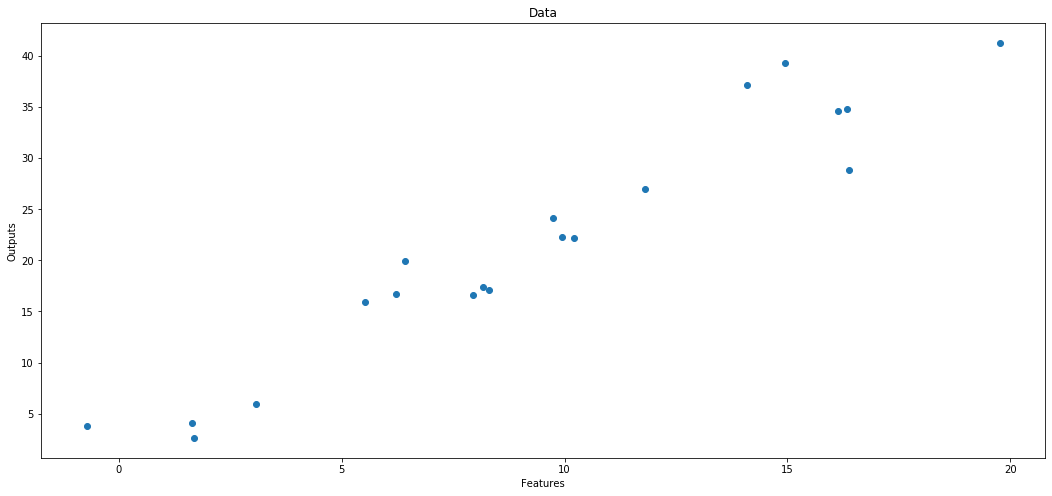

In [5]:
# extract the features and outputs from the first and second column of the data matrix 
x, b = data[:, 0], data[:, 1]

# plot the features versus the outputs 
plt.figure(1, figsize = (18, 8)) 
plt.scatter(x, b) 
plt.xlabel('Features'); plt.ylabel('Outputs') 
plt.title('Data')
plt.show()

Before performing a least squares fit on the data, we have to specify our basis function(s) $f_i$ on the features. To continue with this first principles, explanation, let's imagine the simplest possible basis function, a function which is constant (and thus doesn't treat any feature value differently from another). That is, let's first use the single basis function

$$
f_1(x) = 1
$$

So that our feature matrix $A = \begin{pmatrix} f_1(x_1) \\ f_1(x_2) \\ \vdots \\ f_1(x_n) \end{pmatrix} = \mathbf{1}$ is simply an $n$-vector of 1s. 

Before we compute the least squares data fit with numpy, let's reason about what we should expect. We know that 

$$
\begin{align}
\theta^* &= (A^TA)^{-1}A^Tb \\ 
&= (\mathbf{1}^T\mathbf{1})^{-1}\mathbf{1}^Tb \\ 
&= n^{-1}b  
\end{align}
$$

So, on the last line, we see that the best constant fit to the data is the data mean. We can confirm this by computing the least squares fit to the data in numpy. 

Data mean: 21.578955034043616 
Least squares fit: 21.578955034043616


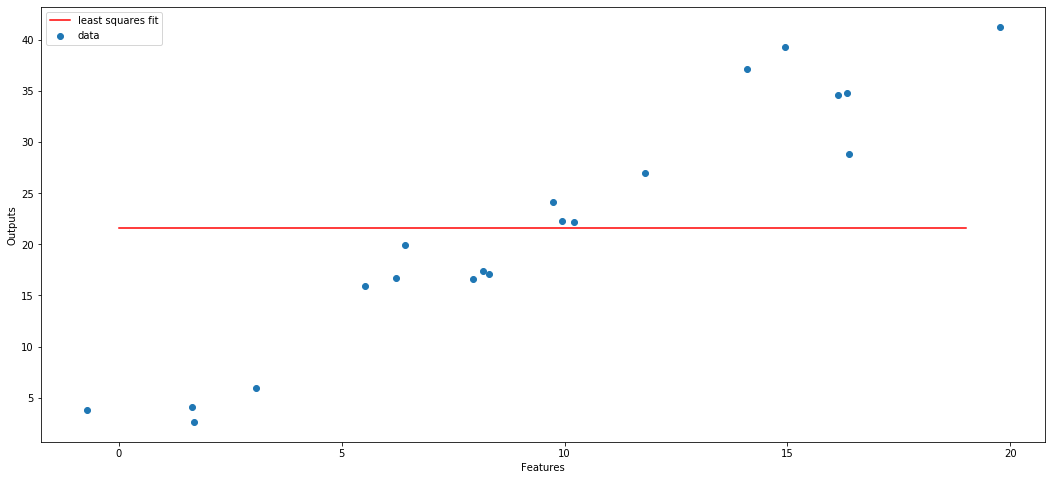

In [6]:
# define our constant "basis function" 
def f1(x : float) -> int: return 1

# construct A 
A = np.array([f1(element) for element in x]) 

# compute theta explicitly 
theta = 1/(np.dot(A, A)) * np.dot(A, b)

# confirm that theta is the data mean 
data_mean = np.mean(b)

print("Data mean: {} \nLeast squares fit: {}".format(data_mean, theta))

# visualize the least squares fit to the data fitting problem with constant basis function 
plt.figure(2, figsize = (18, 8))
plt.scatter(x, b, label = 'data')
plt.plot(A * theta, label = 'least squares fit', c = 'red')
plt.xlabel('Features'); plt.ylabel('Outputs')
plt.legend()
plt.show()

The next, perhaps simplest set of basis functions is that corresponding to an affine fit of the data. That is, a linear function plus an offset, which means $\theta \in \mathbb{R}^2$. Or, to be clear about the basis functions:

$$
\begin{align}
f_1(x) &= 1 \\ 
f_2(x) &= x
\end{align}
$$

so that our model is $\hat{f}(x) = \theta_1 + \theta_2x$

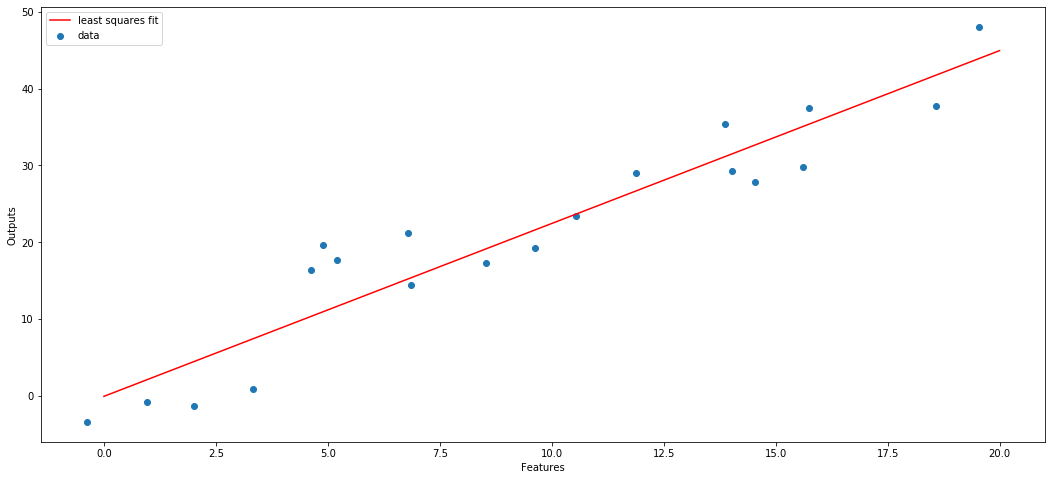

In [7]:
# define our new (second) basis function, which is the identity
def f2(x : float) -> float: return x 

# construct our new A given the new basis functions 
A = np.array([[f1(element), f2(element)] for element in x])

# compute theta explicitly 
theta = np.linalg.inv(A.T @ A) @ A.T @ b

# visualize the new least squares fit to the data fitting problem with affine fit 
plt.figure(2, figsize=(18, 8))
plt.scatter(x, b, label = 'data')
plt.plot(np.linspace(0, 20), theta[0] + theta[1] * np.linspace(0, 20), label = 'least squares fit', c = 'red')
plt.xlabel('Features'); plt.ylabel('Outputs')
plt.legend()
plt.show()

Now that $A$ is a matrix and not a vector, we used the @ symbol to perform matrix multiplication. It's worth introducing the more efficient way to compute the least squares fit. Here we use numpy's `linalg.solve` function to compute the same fit. 

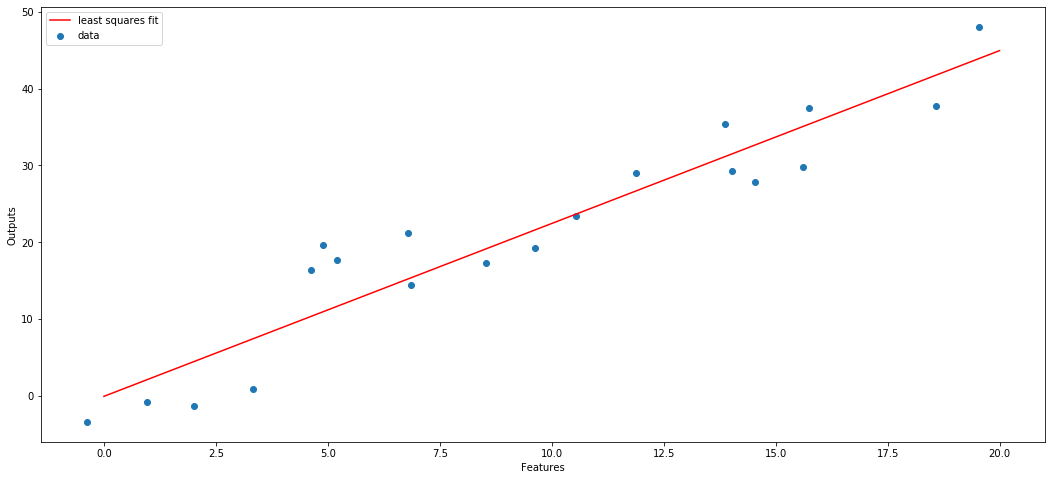

In [8]:
# compute theta a bit more efficiently 
theta = np.linalg.solve(A.T @ A, A.T @ b)

# confirm that the fit is indeed the same 
plt.figure(2, figsize = (18, 8))
plt.scatter(x, b, label = 'data')
plt.plot(np.linspace(0, 20), theta[0] + theta[1] * np.linspace(0, 20), label = 'least squares fit', c = 'red')
plt.xlabel('Features'); plt.ylabel('Outputs')
plt.legend()
plt.show()

#### Polynomial data fitting 

Using polynomials as basis functions is a standard and useful tool. Counterintuitively, they allow us to compute a nonlinear fit in the dataspace, while still solving a simple linear system. In this case we'll load in some data with a known quadratic trend, and fit it with varying numbers of polynomial basis functions.  

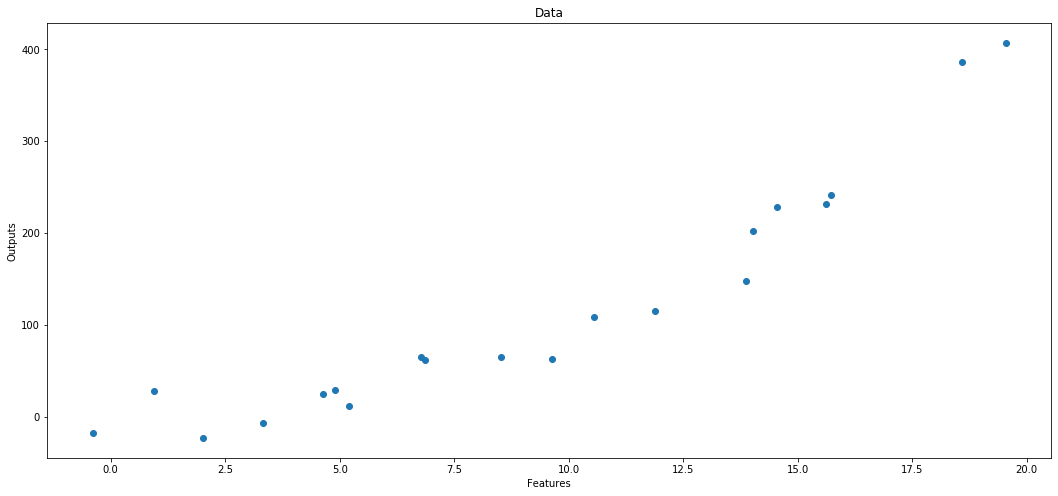

In [9]:
data = quadratic_data 
x, b = data[:, 0], data[:, 1]

# plot the features versus the outputs 
plt.figure(1, figsize = (18, 8)) 
plt.scatter(x, b) 
plt.xlabel('Features'); plt.ylabel('Outputs') 
plt.title('Data')
plt.show()

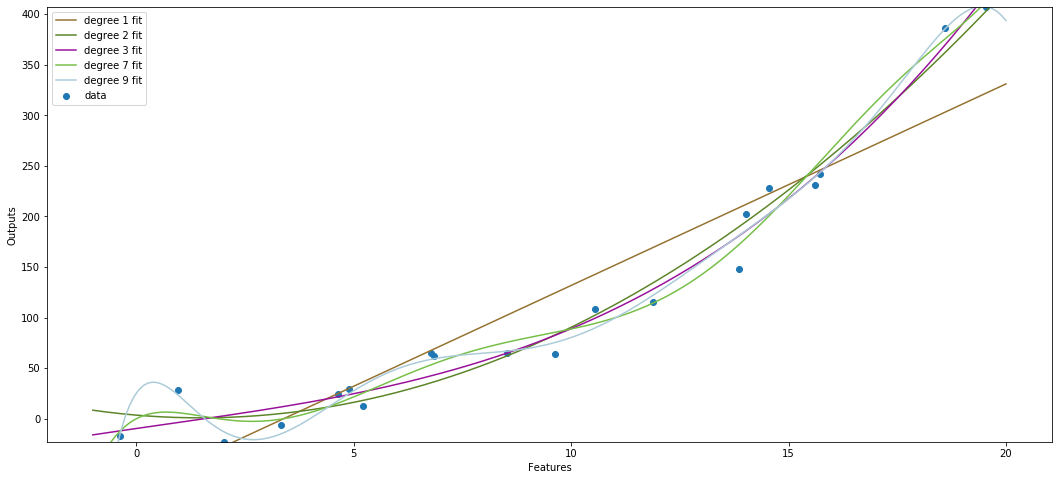

In [10]:
def polynomial_basis(x : float, degree : int) -> np.ndarray: 
    assert degree >= 0 and type(degree) == int, "degree must be a nonnegative integer" 
    feature_vector = [] 
    
    for i in range(degree + 1): 
        feature_vector.append(x**i)
        
    return np.array(feature_vector)

# For a variety of degrees, compute A, theta, and plot the result 
degrees = [1, 2, 3, 7, 9]
plt.figure(1, figsize = (18, 8))
plt.scatter(x, b, label = 'data')

for degree in degrees: 
    A = np.array([polynomial_basis(element, degree) for element in x])
    theta = np.linalg.solve(A.T @ A, A.T @ b)
    fit = np.array([np.sum(np.array([theta[i] * (xi ** i) for i in range(degree + 1)]).T) for xi in np.linspace(-1, 20, 200)])
    plt.plot(np.linspace(-1, 20, 200), fit, label = 'degree {} fit'.format(degree), c = np.random.rand(3,)) 

plt.ylim(np.min(b), np.max(b))
plt.xlabel('Features'); plt.ylabel('Outputs')
plt.legend()
plt.show() 
    

#### Periodic Basis 

Now we will apply the least squares data fitting technique to data with a _periodic_ trend. This often appears in applications with time-series data, where the objective is to identify long and short term periodic structure in the data, and to _forecast_ for future values of the time-series. 

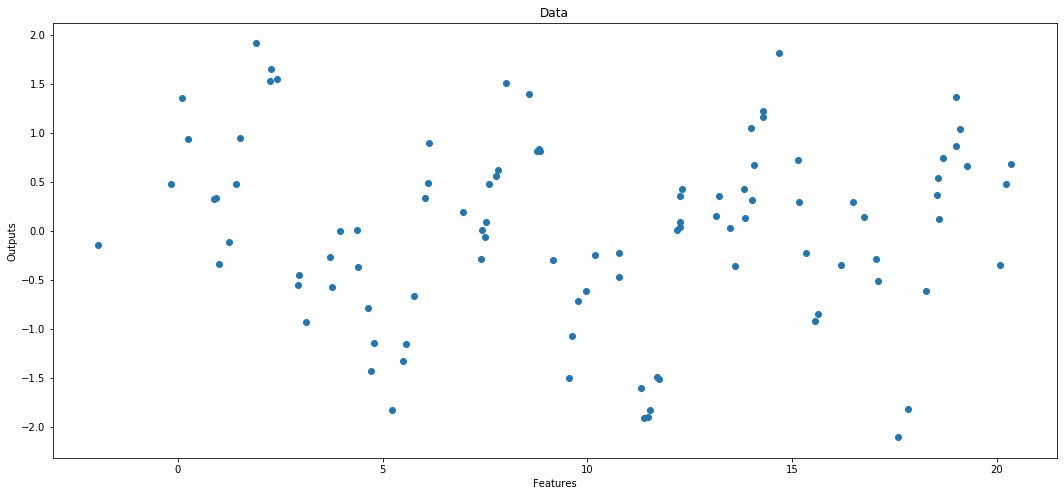

In [9]:
data = periodic_data
x, b = data[:, 0], data[:, 1]

# plot the features versus the outputs 
plt.figure(1, figsize = (18, 8)) 
plt.scatter(x, b) 
plt.xlabel('Features'); plt.ylabel('Outputs') 
plt.title('Data')
plt.show()

The standard periodic basis is the fourier basis, so we will take a linear combinations of $sin$ and $cos$ functions of different frequencies. 

In [10]:
def fourier_basis(x : float, num_terms : int) -> np.ndarray: 
    assert num_terms >= 0 and type(num_terms) == int, "num_terms must be a nonnegative integer" 
    feature_vector = [1] 
    
    for i in range(1, num_terms + 1): 
        feature_vector.append(sin(i * x))
        feature_vector.append(cos(i * x))
        
    return np.array(feature_vector)   
    
    

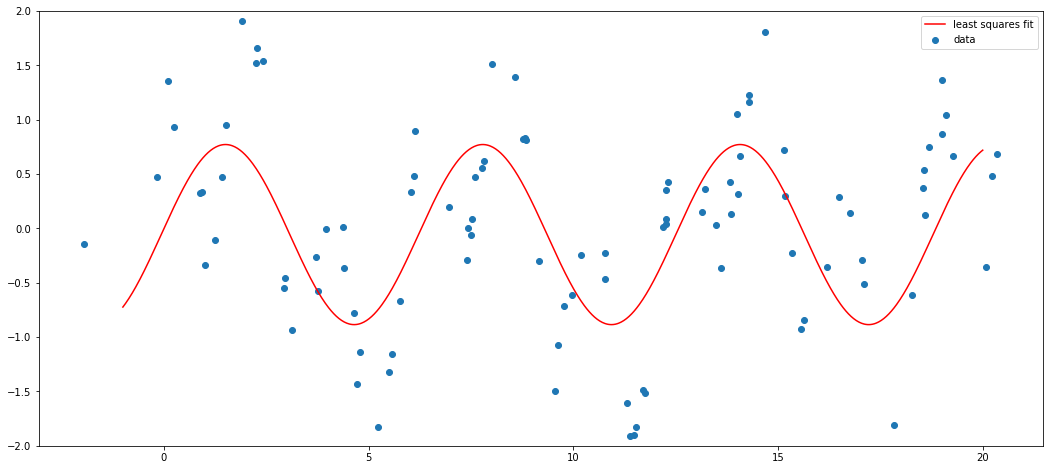

In [13]:
terms = 1

A = np.array([fourier_basis(element, terms) for element in x])
theta = np.linalg.solve(A.T @ A, A.T @ b)
plt.figure(1, figsize = (18, 8))
plt.scatter(x, b, label = 'data')
dom = np.linspace(-1, 20, 1000)
fit = np.array([np.dot(theta.T, fourier_basis(element, terms)) for element in dom])
plt.plot(dom, fit, label = 'least squares fit', c = 'red')
plt.ylim(-2, 2)
plt.legend()
plt.show()

#### Applications

Now that we've seen least squares applied to a variety of mathematical data, let's explore its use on some real datasets. 


We'll start by computing it by hand, and then show how Python's statsmodels library provides useful statistical information about the quality of our regression, and ways to interpret our fit. 

In [1]:
from sklearn.datasets import load_boston 

In [2]:
X, y = load_boston(return_X_y=True)

Here we'll plot one of the features of the dataset against the target variable, the price of a given house. 

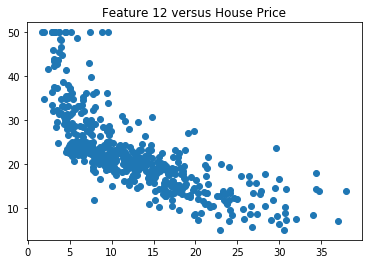

In [18]:
plt.figure(1)
plt.scatter(X[:, 12], y) 
plt.title('Feature 12 versus House Price')
plt.show()

In [20]:
# create feature matrix by prepending a column of ones
A = np.vstack((np.ones_like(X[:, 12]), X[:, 12])).T

# compute least squares fit 
w = np.linalg.solve(A.T@A, A.T@y)

Now we'll plot our fit against the data and compute the $R^2$ value as a measure of goodness of fit. 

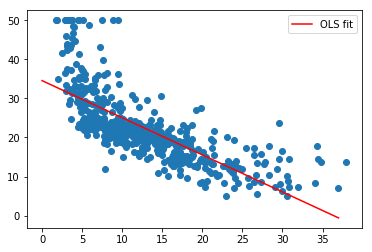

R squared: 0.54


In [28]:
dom = np.linspace(0, 37, 100)
plt.figure()
plt.scatter(X[:, 12], y) 
plt.plot(dom, w[0] + dom * w[1], c='r', label='OLS fit')
plt.legend()
plt.show()

ss_mean = np.sum((y - np.mean(y))**2)
ss_fit = np.sum((y - A@w)**2)

r_sqr = 1 - (ss_fit/ss_mean)
print(f'R squared: {round(r_sqr, 2)}')

We can see our linear basis does a decent job fitting the data, explaining only 54% of the variation in the outpit. Now we'll add a quadratic basis function and re-fit the data and recompute the $R^2$ value. 

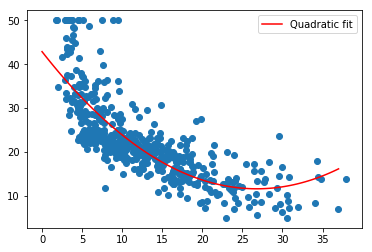

R squared: 0.64


In [29]:
A = np.vstack((np.ones_like(X[:, 12]), X[:, 12], X[:, 12]**2)).T
w = np.linalg.solve(A.T@A, A.T@y)

dom = np.linspace(0, 37, 100)
plt.figure()
plt.scatter(X[:, 12], y) 
plt.plot(dom, w[0] + dom * w[1] + dom**2 * w[2], c='r', label='Quadratic fit')
plt.legend()
plt.show()

ss_mean = np.sum((y - np.mean(y))**2)
ss_fit = np.sum((y - A@w)**2)

r_sqr = 1 - (ss_fit/ss_mean)
print(f'R squared: {round(r_sqr, 2)}')

We can see that the quadratic model does a significantly better job. Now we can fit the same model using the statsmodels library and recieve a great deal of information about our fit. 

In [30]:
import statsmodels.api as sm 

In [31]:
ls = sm.OLS(y, A).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          1.56e-112
Time:                        10:48:29   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.0